# Data Munging Exercise 1.1:

    Open up a new Jupyter notebook
    Download a few MTA turnstile data files from http://web.mta.info/developers/turnstile.html
    Open up a file, use csv reader to read it, make a python dict (or pandas data frame) where there is a key for
    each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of
    lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look 
    like :

In [2]:
#{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
#                                                ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
#                                                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
#                                                ... ] }

Import three weeks of turnstile data using pandas (note: would need to modify function to continuously scrape all turnstile data as it is generated).

In [3]:
from __future__ import print_function, division

In [4]:
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create a pandas dataframe.

In [5]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [6]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [81]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [10]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,REGULAR,5554,271
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,REGULAR,5554,271
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,REGULAR,5554,271
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,REGULAR,5554,271
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,REGULAR,5554,271


In [11]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

# Data MungingExercise 1.2

Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://labix.org/python-dateutil) module to convert it into a datetime object. For an example check [this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like:

In [12]:
# { ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788],
#                                                 [datetime.datetime(2013, 3, 2, 7, 0), 2585],
#                                                 [datetime.datetime(2013, 3, 2, 12, 0), 10653], 
#                                                 [datetime.datetime(2013, 3, 2, 17, 0), 11016],
#                                                 [datetime.datetime(2013, 3, 2, 23, 0), 10666],
#                                                 [datetime.datetime(2013, 3, 3, 3, 0), 10814],
#                                                 [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [13]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [14]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [15]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,2016-08-27 16:00:00


In [16]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" are unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [19]:
import datetime
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00


* Looks to be a incorrect AUD entry. May be we should just select the Regular One.

In [20]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

In [21]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


* No more duplicate entries.

In [23]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

# Exercise 1.3

*    These counts are for every n hours. (What is n?) We want total daily entries.

Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [80]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [81]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [82]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [83]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [28]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [29]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [30]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [31]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,493419121,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,493419616,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,493420159,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,493420679,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,493420936,2016-08-27 04:00:00


* Counter working in Reverse??? - WTF!?!

In [33]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         20
             01-00-04  57 ST-7 AV         17
             01-00-05  57 ST-7 AV         20
A016   R081  03-06-01  49 ST               1
A025   R023  01-03-02  34 ST-HERALD SQ    20
A049   R088  02-05-00  CORTLANDT ST       15
A066   R118  00-00-00  CANAL ST           20
C019   R232  00-00-02  45 ST              20
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J034   R007  00-00-02  104 ST             20
JFK01  R535  00-00-01  HOWARD BCH JFK      1
             00-00-02  HOWARD BCH JFK      1
             00-00-03  HOWARD BCH JFK      2
JFK02  R535  01-00-01  HOWARD BCH JFK      1
             01-00-02  HOWARD BCH JFK      1
             01-00-03  HOWARD BCH JFK      1
             01-00-04  HOWARD BCH JFK      1
             01-00-05  HOWARD BCH JFK      1
             01-00-06  HOWARD BCH JFK      1
JFK03  R536  00-00-01  JFK JAMAICA CT1     2
             00-

In [34]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [36]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


# Exercise 1.4

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

In [37]:
import datetime
from matplotlib.finance import date2num

In [38]:
counts = turnstiles_daily.iloc[:,[8]]
dates = turnstiles_daily.iloc[:,[4]]
#convert dates
dates = dates.astype(str).apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

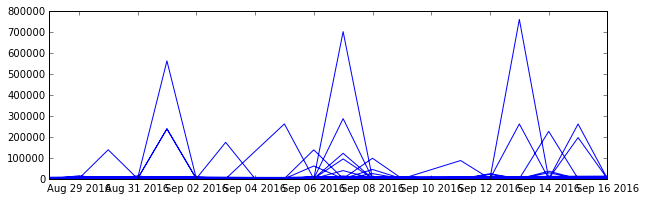

In [39]:
#PLOT
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.show()

# Exercise 1.5

* So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [48]:
#Drop SCP column
turnstiles_daily.drop('SCP', axis=1)


,C/A,UNIT,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0
6,A002,R051,59 ST,09/02/2016,5808616,09/01/2016,5806990.0,1626.0
7,A002,R051,59 ST,09/03/2016,5809522,09/02/2016,5808616.0,906.0
8,A002,R051,59 ST,09/04/2016,5810188,09/03/2016,5809522.0,666.0
9,A002,R051,59 ST,09/05/2016,5810871,09/04/2016,5810188.0,683.0
10,A002,R051,59 ST,09/06/2016,5812270,09/05/2016,5810871.0,1399.0


In [41]:
#aggregate and bucket by CA/UNIT/STATION
turnstiles_daily.groupby(["C/A", "UNIT", "STATION"]).DAILY_ENTRIES.sum()

C/A    UNIT  STATION        
A002   R051  59 ST              289823.0
A006   R079  5 AV/59 ST         230669.0
A007   R079  5 AV/59 ST         105122.0
A010   R080  57 ST-7 AV         294139.0
A011   R080  57 ST-7 AV         207127.0
A013   R081  49 ST              111606.0
A014   R081  49 ST               74521.0
A015   R081  49 ST              191332.0
A016   R081  49 ST              344960.0
A021   R032  TIMES SQ-42 ST     203023.0
A022   R022  34 ST-HERALD SQ    293974.0
A025   R023  34 ST-HERALD SQ    494572.0
A027   R082  28 ST              125523.0
A029   R082  28 ST              104082.0
A030   R083  23 ST              268476.0
A031   R083  23 ST              177482.0
A033   R170  14 ST-UNION SQ     346729.0
A034   R170  14 ST-UNION SQ     431425.0
A035   R170  14 ST-UNION SQ     164397.0
A037   R170  14 ST-UNION SQ     305634.0
A038   R085  8 ST-NYU           225591.0
A039   R085  8 ST-NYU           105636.0
A041   R086  PRINCE ST          198125.0
A042   R086  PRINCE ST      

# Exercise 1.6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [64]:
turnstiles_daily.groupby(["STATION","DATE"]).DAILY_ENTRIES.sum()

STATION    DATE      
1 AV       08/28/2016    13871.0
           08/29/2016    18064.0
           08/30/2016    19182.0
           08/31/2016    19616.0
           09/01/2016    20170.0
           09/02/2016    20439.0
           09/03/2016    15187.0
           09/04/2016    12951.0
           09/05/2016    11376.0
           09/06/2016    19007.0
           09/07/2016    20756.0
           09/08/2016    23347.0
           09/09/2016    24124.0
           09/10/2016    19432.0
           09/11/2016    15778.0
           09/12/2016    19249.0
           09/13/2016    22949.0
           09/14/2016    23671.0
           09/15/2016    24269.0
           09/16/2016    24650.0
103 ST     08/28/2016    11981.0
           08/29/2016    27617.0
           08/30/2016    29685.0
           08/31/2016    30240.0
           09/01/2016    29911.0
           09/02/2016    29622.0
           09/03/2016    19287.0
           09/04/2016    16457.0
           09/05/2016    16794.0
           09/06/2016

# Exercise 1.7

Plot the time series for a station.

In [86]:
turnstiles_daily_59th = turnstiles_daily[(turnstiles_daily["STATION"]=="59 ST")]

turnstiles_daily_59th.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


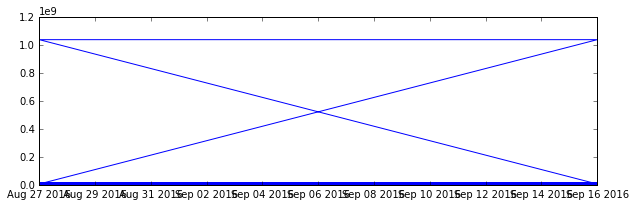

In [88]:
#PLOT
counts = turnstiles_daily_59th.iloc[:,[5]]
dates = turnstiles_daily_59th.iloc[:,[4]]
#convert dates
dates = dates.astype(str).apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.show()

# Exercise 1.8

*    Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.


In [5]:
turnstiles_daily.head()
stationcounts = turnstiles_daily.iloc[:,[8]]
dates = turnstiles_daily.iloc[:,[4]]
#convert dates
dates = dates.astype(str).apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

NameError: name 'turnstiles_daily' is not defined

# 1.9 Weekly Station Counts

In [3]:
def get_weekly_stationcounts(stationcounts):

    total_list = []
    
    stations = stationcounts.keys()
    
    for s in stations:
        total = 0
        dates = [stationcounts[s][i][0] for i in range(len(stationcounts[s])-1)]
        start_date = min(dates)
        
        for row in stationcounts[s]:
            total += int(row[1])
        
        new_entry = [s[0], s[1], start_date, total]
        total_list.append(new_entry)
    
    return total_list

# 1.10 Create DF

In [4]:
weekly_totals = get_weekly_stationcounts(stationcounts)
columns2=['STATION','LINENAME','DATE','WEEKLY ENTRIES']
weekly_totals_df = pd.DataFrame(weekly_totals, columns=columns2)

weekly_totals_df


NameError: name 'stationcounts' is not defined